In [8]:
import pandas as pd
import matplotlib
import csv
from pprint import pprint
import glob
import os
import sys

In [9]:
# File paths
PLAYER_STATS_FOLDER = 'stats/player/'
TEAM_STATS_FOLDER = 'stats/team/'

In [25]:
game_stats = pd.read_csv(f"{PLAYER_STATS_FOLDER}relational/2025-07-13_game_stats.csv")
szn_stats = pd.read_csv(f"{PLAYER_STATS_FOLDER}relational/2025_stats.csv")

In [33]:
print(szn_stats['primaryPosition'].unique())

['C' 'P' 'RF' '1B' 'LF' 'DH' '3B' '2B' 'SS' 'CF' 'TWP']


In [36]:
szn_grouped = szn_stats.groupby(szn_stats.primaryPosition)
pitcher_stats = szn_grouped.get_group("P")
firstbase_stats = szn_grouped.get_group("1B")
print(firstbase_stats.head())

    domain  season  playerId        playerName primaryPosition  updateDate  \
3   player    2025    457759     Justin Turner              1B  2025-07-13   
4   player    2025    467793    Carlos Santana              1B  2025-07-13   
6   player    2025    502671  Paul Goldschmidt              1B  2025-07-13   
10  player    2025    518692   Freddie Freeman              1B  2025-07-13   
21  player    2025    547180      Bryce Harper              1B  2025-07-13   

    fielding_airOuts  fielding_atBats fielding_atBatsPerHomeRun  fielding_avg  \
3                 42              112                     56.00         0.214   
4                101              310                     28.18         0.232   
6                 97              334                     41.75         0.287   
10                76              312                     31.20         0.295   
21                69              250                     25.00         0.260   

    ...  pitching_strikeoutWalkRatio  pitchi

,domain,season,playerId,playerName,primaryPosition,updateDate,fielding_airOuts,fielding_atBats,fielding_atBatsPerHomeRun,fielding_avg,...,pitching_strikeoutWalkRatio,pitching_strikeoutsPer9Inn,pitching_strikes,pitching_totalBases,pitching_triples,pitching_walksPer9Inn,pitching_whip,pitching_wildPitches,pitching_winPercentage,pitching_wins
1,player,2025,455119,Chris Martin,P,2025-07-13,34,126,NaN,0.238,...,6.80,9.37,330.0,44,0,1.38,1.07,1.0,.000,0.0
7,player,2025,506433,Yu Darvish,P,2025-07-13,6,31,NaN,0.258,...,1.17,7.56,87.0,12,0,6.48,1.68,1.0,.000,0.0
22,player,2025,547184,Michael Kelly,P,2025-07-13,16,43,NaN,0.209,...,1.00,5.54,119.0,16,0,5.54,1.31,1.0,1.000,2.0
24,player,2025,554430,Zack Wheeler,P,2025-07-13,102,436,NaN,0.181,...,5.92,11.36,1239.0,137,1,1.92,0.86,1.0,.750,9.0
25,player,2025,571510,Matthew Boyd,P,2025-07-13,136,406,NaN,0.227,...,4.43,8.22,1145.0,141,2,1.85,1.03,1.0,.769,10.0


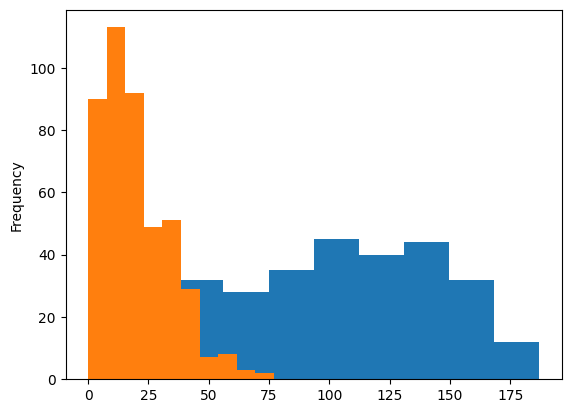

In [29]:
szn_stats['pitching_leftOnBase'].plot.hist()
szn_stats['pitching_baseOnBalls'].plot.hist()
pitcher_stats.head()

<Axes: ylabel='Frequency'>

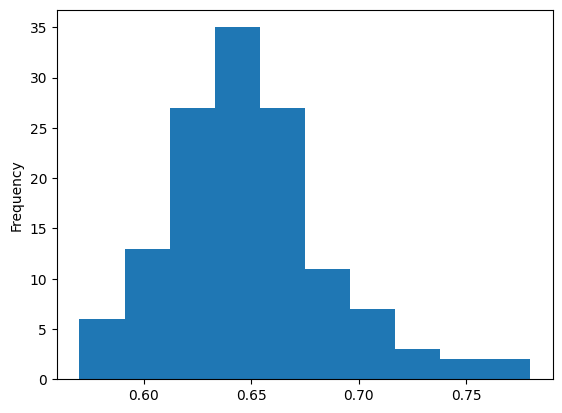

In [21]:
szn_stats['pitching_strikePercentage'].plot.hist()

print(szn_stats['pitching_inningsPitched'])
szn_stats['pitching_inningsPitched'].plot.hist()

In [25]:
szn_stats['pitching_inningsPitchedDecimal'] = szn_stats['pitching_inningsPitched'].str.rsplit('.')[0] + (0.333 * szn_stats['pitching_inningsPitched'].str.rsplit('.')[1])
szn_stats['pitching_baseOnBallsAvg'] = szn_stats['pitching_baseOnBalls'] / szn_stats['pitching_inningsPitchedDeceimal']

AttributeError: Can only use .str accessor with string values!